In [1]:
"""
- Solución de ecuaciones diferenciales
    - Ecuaciones lineales
        - Ejemplo sin valores iniciales con Sympy
        - Ejemplo con valores iniciales con Sympy
        - Ejemplo con valores iniciales con Scipy
    - Ecuaciones no lineales    
"""

'\n- Solución de ecuaciones diferenciales\n    - Ecuaciones lineales\n        - Ejemplo sin valores iniciales con Sympy\n        - Ejemplo con valores iniciales con Sympy\n        - Ejemplo con valores iniciales con Scipy\n    - Ecuaciones no lineales    \n'

In [2]:
# Ec. Diferencial Lineal
## Ejemplo sin valores iniciales con Sympy

from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

t = symbols('t')
x = Function('x')
f = x(t).diff(t) + x(t) - sin(t)
sol = dsolve(f)
print(sol)

Eq(x(t), C1*exp(-t) + sin(t)/2 - cos(t)/2)


In [3]:
# Define the differential equation
f = Function('f')
# x = symbols('x')
t = symbols('t')
diff_eq = Eq(f(t).diff(t, t) - 2*f(t).diff(t) + f(t), sin(t))

# Solve the differential equation
sol = dsolve(diff_eq, f(t))

# Substitute t with 0 and f(0) with x0 in the solution
x0 = symbols('x0')
sol_at_t0 = sol.subs({t: 0, f(0): x0})

print(sol_at_t0)

Eq(f(0), C1 + 1/2)


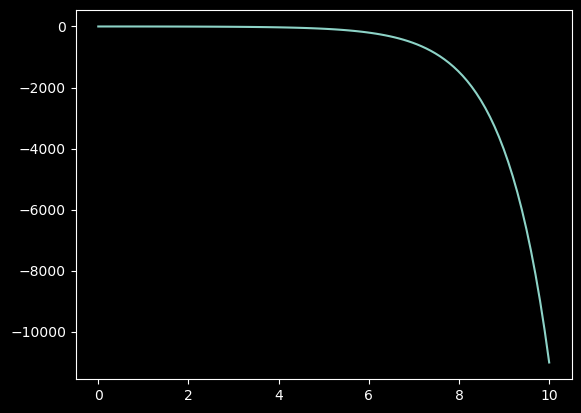

In [4]:
# Ejemplo con valores iniciales con Scipy

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def model(t, y):
    return y - np.sin(t)

t_span = [0, 10]

sol = solve_ivp(model, t_span, [0], t_eval=np.linspace(0, 10, 100))

plt.plot(sol.t, sol.y[0])

plt.show()


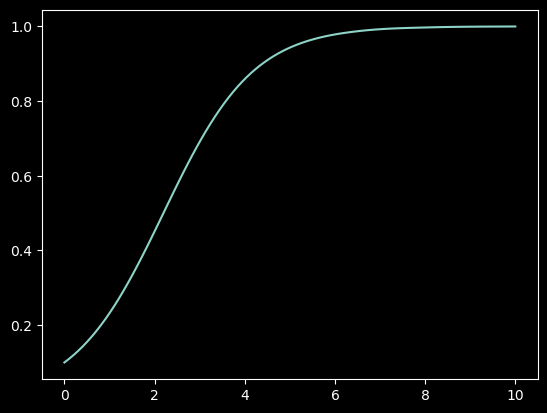

In [5]:
# Ec. Diferencial No Lineal

from scipy.integrate import solve_ivp
import numpy as np

def model(t, y):
    return y - y**2

t_span = [0, 10]

sol = solve_ivp(model, t_span, [0.1], t_eval=np.linspace(0, 10, 100))

plt.plot(sol.t, sol.y[0])

plt.show()
